```Леонид Кулыгин```

# Библиотеки

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')
sns.set() 

# Загрузка и описание датасета

In [4]:
data = pd.read_csv('weatherAUS.csv')

In [5]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
data.shape

(145460, 23)

# Первичный анализ 

Описание датасета

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

статистика числовых признаков

In [8]:
data.select_dtypes(exclude='object').describe().T # вывод статистики для числовых признаков 

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


статистика категориальных признаков

In [9]:
data.select_dtypes(include='object').describe() # вывод статистики для категориальных признаков 

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


Корелляционная матрица для числовых признаков

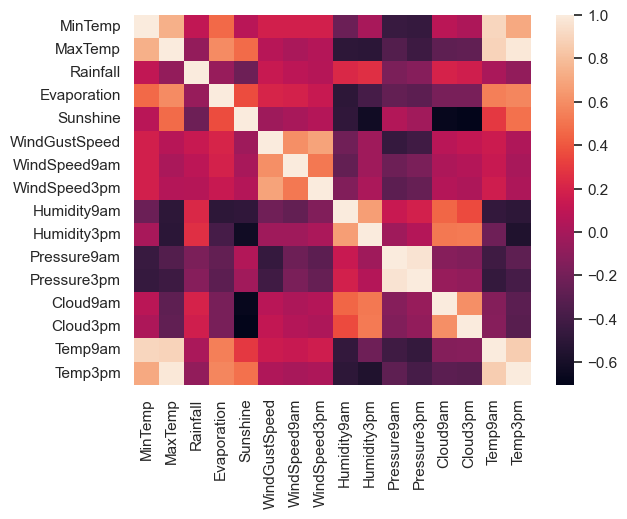

In [10]:
sns.heatmap(data.select_dtypes(exclude='object').corr())
plt.show()

Нулевые значения

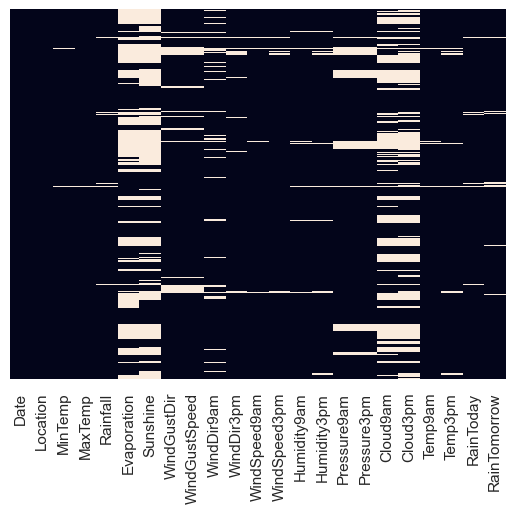

In [11]:
sns.heatmap(data.isna(), cbar=False, yticklabels=False)
plt.show()

In [12]:
data.isna().any()

Date             False
Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday         True
RainTomorrow      True
dtype: bool

# Очистка данных

In [13]:
data.isna()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
2,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
4,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
145456,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
145457,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
145458,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


!!!! ВЫРЕЗАЕМ ДАННЫЕ, У КОТОРЫХ БОЛЕЕ 3 ПРОПУЩЕННЫХ СТОЛБЦОВ

In [14]:
underf = data.isna().sum(axis=1)
data = data[underf>3]
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


удаляем столбцы у которых больше 10% пропущенные данные 

In [15]:
corp = data.isna().sum()/data.shape[0] * 100 
data = data.drop(columns=data.columns[corp>10])
data

,Date,Location,MinTemp,MaxTemp,Rainfall,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
1,2008-12-02,Albury,7.4,25.1,0.0,WSW,4.0,22.0,44.0,25.0,17.2,24.3,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,E,11.0,9.0,45.0,16.0,18.1,26.5,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,W,19.0,24.0,55.0,23.0,20.6,28.9,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,W,6.0,17.0,48.0,19.0,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NW,7.0,28.0,42.0,9.0,18.3,30.2,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,E,15.0,13.0,59.0,27.0,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,ENE,13.0,11.0,51.0,24.0,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,N,13.0,9.0,56.0,21.0,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,WNW,9.0,9.0,53.0,24.0,12.5,26.1,No,No


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50003 entries, 1 to 145459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          50003 non-null  object 
 1   Location      50003 non-null  object 
 2   MinTemp       48579 non-null  float64
 3   MaxTemp       48775 non-null  float64
 4   Rainfall      46868 non-null  float64
 5   WindDir3pm    46093 non-null  object 
 6   WindSpeed9am  48269 non-null  float64
 7   WindSpeed3pm  46955 non-null  float64
 8   Humidity9am   47586 non-null  float64
 9   Humidity3pm   45721 non-null  float64
 10  Temp9am       48304 non-null  float64
 11  Temp3pm       46409 non-null  float64
 12  RainToday     46868 non-null  object 
 13  RainTomorrow  47364 non-null  object 
dtypes: float64(9), object(5)
memory usage: 5.7+ MB


Убираем строчки с пропущенными данными 

In [17]:
data = data.dropna()

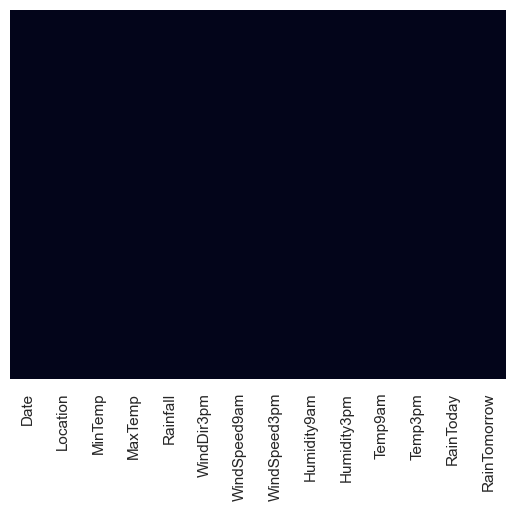

In [18]:
sns.heatmap(data.isna(), cbar=False, yticklabels=False)
plt.show()

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40690 entries, 1 to 145457
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          40690 non-null  object 
 1   Location      40690 non-null  object 
 2   MinTemp       40690 non-null  float64
 3   MaxTemp       40690 non-null  float64
 4   Rainfall      40690 non-null  float64
 5   WindDir3pm    40690 non-null  object 
 6   WindSpeed9am  40690 non-null  float64
 7   WindSpeed3pm  40690 non-null  float64
 8   Humidity9am   40690 non-null  float64
 9   Humidity3pm   40690 non-null  float64
 10  Temp9am       40690 non-null  float64
 11  Temp3pm       40690 non-null  float64
 12  RainToday     40690 non-null  object 
 13  RainTomorrow  40690 non-null  object 
dtypes: float64(9), object(5)
memory usage: 4.7+ MB


# Выбросы 

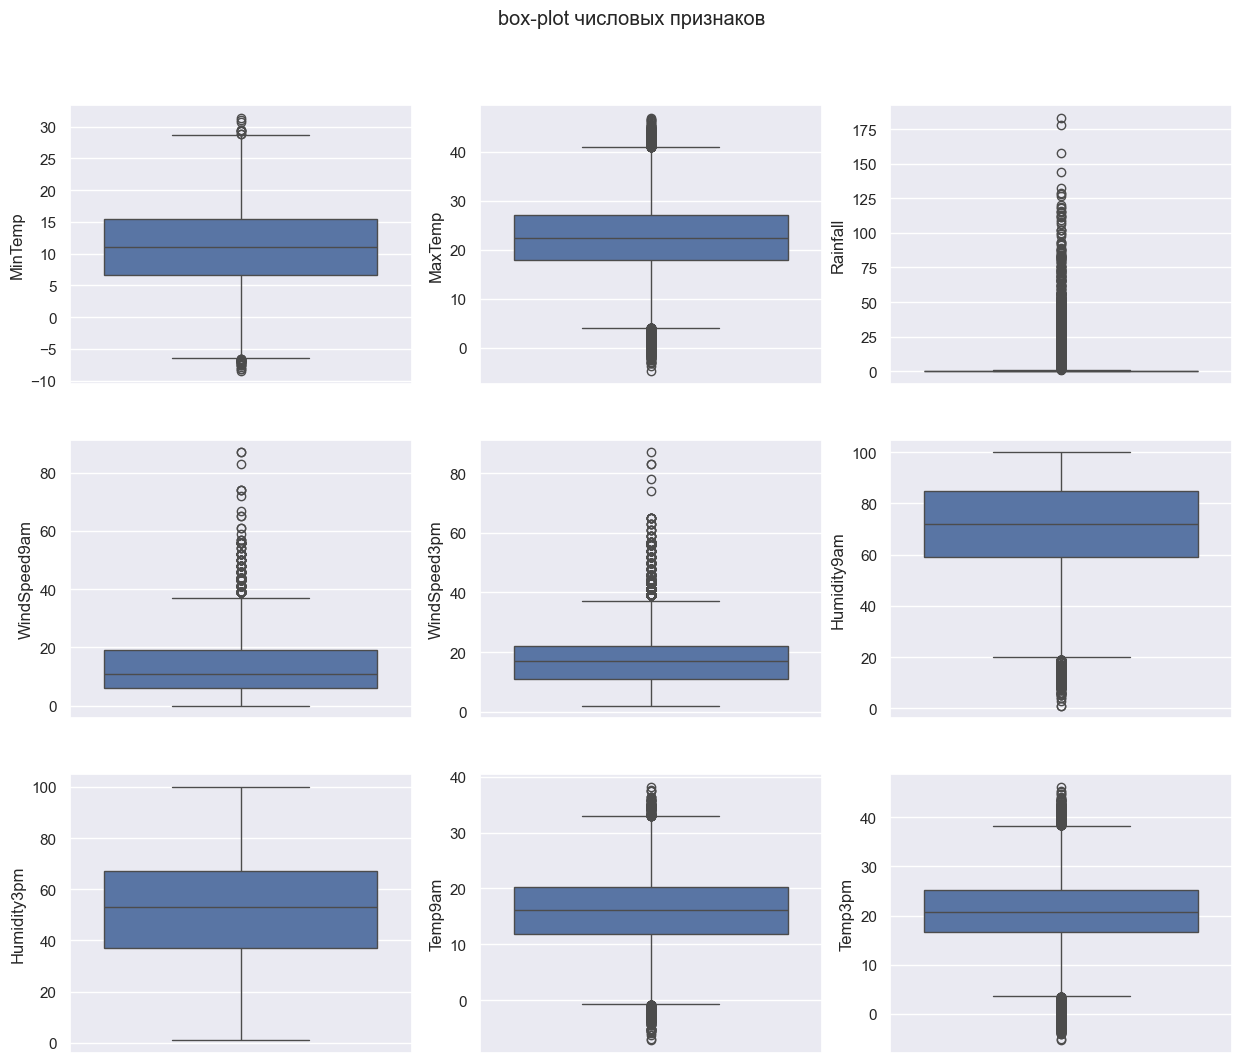

In [20]:
fig, axes = plt.subplots(3,3,figsize=(15,12))


plt.suptitle('box-plot числовых признаков')
plt.subplots_adjust(top=0.9) # отступ для заголовка

sns.boxplot(data, y='MinTemp', ax=axes[0][0])
sns.boxplot(data, y='MaxTemp', ax=axes[0][1])
sns.boxplot(data, y='Rainfall', ax=axes[0][2])
sns.boxplot(data, y='WindSpeed9am', ax=axes[1][0])
sns.boxplot(data, y='WindSpeed3pm', ax=axes[1][1])
sns.boxplot(data, y='Humidity9am', ax=axes[1][2])
sns.boxplot(data, y='Humidity3pm', ax=axes[2][0])
sns.boxplot(data, y='Temp9am', ax=axes[2][1])
sns.boxplot(data, y='Temp3pm', ax=axes[2][2])

plt.show()

удаляются все данные в выборке, значения которых лежат вне диапазона с границей в полтора межквартильных размаха от внутренних границ нижнего и верхнего квартилей, т. е. лежащих вне интервала

In [21]:
columnnum = data.select_dtypes(exclude='object') # выбираем числовые признаки

dd = dict() # словарь с нижней границей выбросов
du = dict() # словарь с верхней границей выбросов

for name in columnnum:
    '''[𝑥25−1,5 ∙ 𝑥75 − 𝑥25 ; 𝑥75 + 1,5 ∙ (𝑥75 − 𝑥25)]'''
    Q1, Q3 = data[name].quantile([0.25, 0.75])
    down = Q1 - 1.5 * (Q3 - Q1) # формула нижней границы
    up = Q3 + 1.5 * (Q3 - Q1) # формула верхней границы

    
    dd[name] =  [down]
    du[name] = [up]
    
emission = pd.concat([pd.DataFrame(dd), pd.DataFrame(du)]).T # добавляем в один датафрейм нижние и верхние границы
emission.columns = ['down', 'up'] # переименовываем столбцы
emission

,down,up
MinTemp,-6.50,28.70
MaxTemp,4.10,40.90
Rainfall,-0.60,1.00
WindSpeed9am,-13.50,38.50
WindSpeed3pm,-5.50,38.50
Humidity9am,20.00,124.00
Humidity3pm,-8.00,112.00
Temp9am,-0.70,32.90
Temp3pm,3.55,38.35


In [22]:
for name in columnnum:
    arr = data[name]
    data.loc[:, name][(data[name] < emission['down'][name])] = emission.loc[name, 'down']
    data.loc[:, name][(data[name] > emission['up'][name])] = emission.loc[name, 'up']

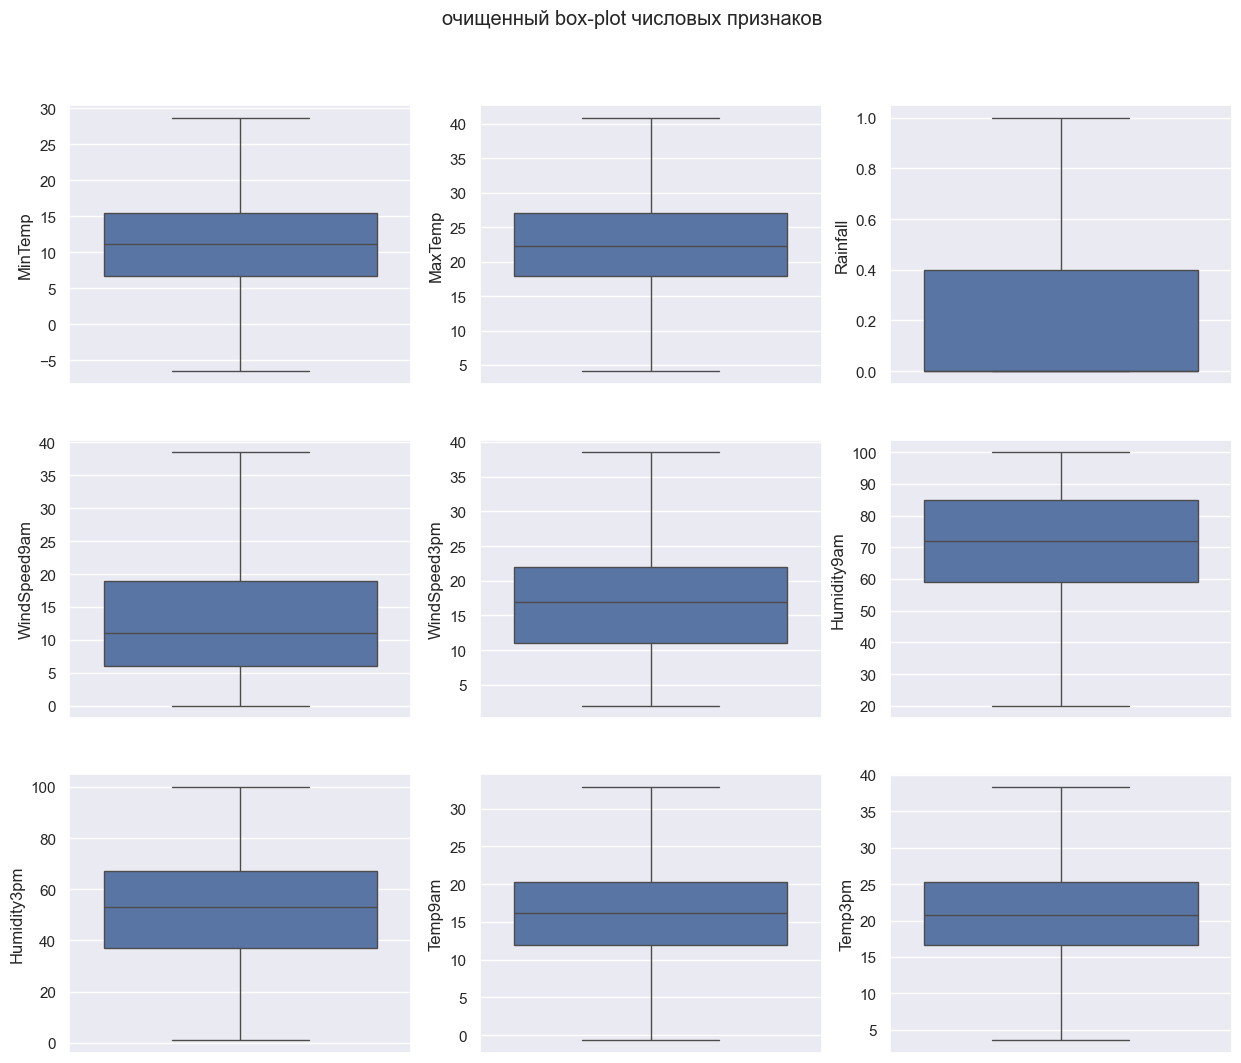

In [23]:
fig, axes = plt.subplots(3,3,figsize=(15,12))


plt.suptitle('очищенный box-plot числовых признаков')
plt.subplots_adjust(top=0.9) # отступ для заголовка

sns.boxplot(data, y='MinTemp', ax=axes[0][0])
sns.boxplot(data, y='MaxTemp', ax=axes[0][1])
sns.boxplot(data, y='Rainfall', ax=axes[0][2])
sns.boxplot(data, y='WindSpeed9am', ax=axes[1][0])
sns.boxplot(data, y='WindSpeed3pm', ax=axes[1][1])
sns.boxplot(data, y='Humidity9am', ax=axes[1][2])
sns.boxplot(data, y='Humidity3pm', ax=axes[2][0])
sns.boxplot(data, y='Temp9am', ax=axes[2][1])
sns.boxplot(data, y='Temp3pm', ax=axes[2][2])

plt.show()

# Распределение признаков 

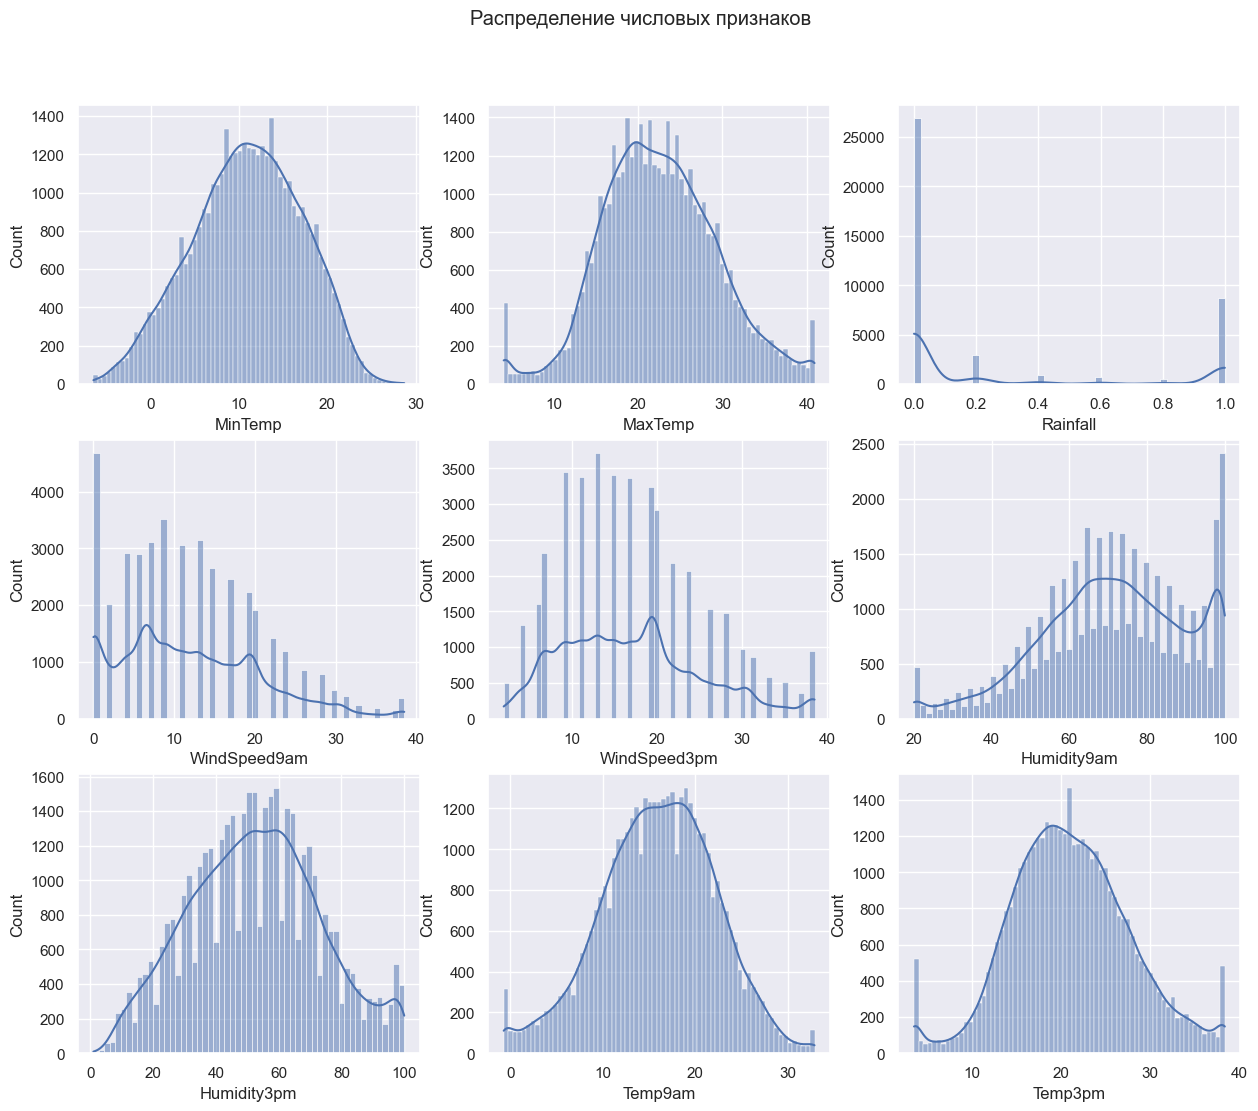

In [24]:
fig, axes = plt.subplots(3,3,figsize=(15,12))


plt.suptitle('Распределение числовых признаков')
plt.subplots_adjust(top=0.9)


sns.histplot(data, x='MinTemp', ax=axes[0][0], kde=True)
sns.histplot(data, x='MaxTemp', ax=axes[0][1], kde=True)
sns.histplot(data, x='Rainfall', ax=axes[0][2], kde=True)
sns.histplot(data, x='WindSpeed9am', ax=axes[1][0], kde=True)
sns.histplot(data, x='WindSpeed3pm', ax=axes[1][1], kde=True)
sns.histplot(data, x='Humidity9am', ax=axes[1][2], kde=True)
sns.histplot(data, x='Humidity3pm', ax=axes[2][0], kde=True)
sns.histplot(data, x='Temp9am', ax=axes[2][1], kde=True)
sns.histplot(data, x='Temp3pm', ax=axes[2][2], kde=True)



plt.show()

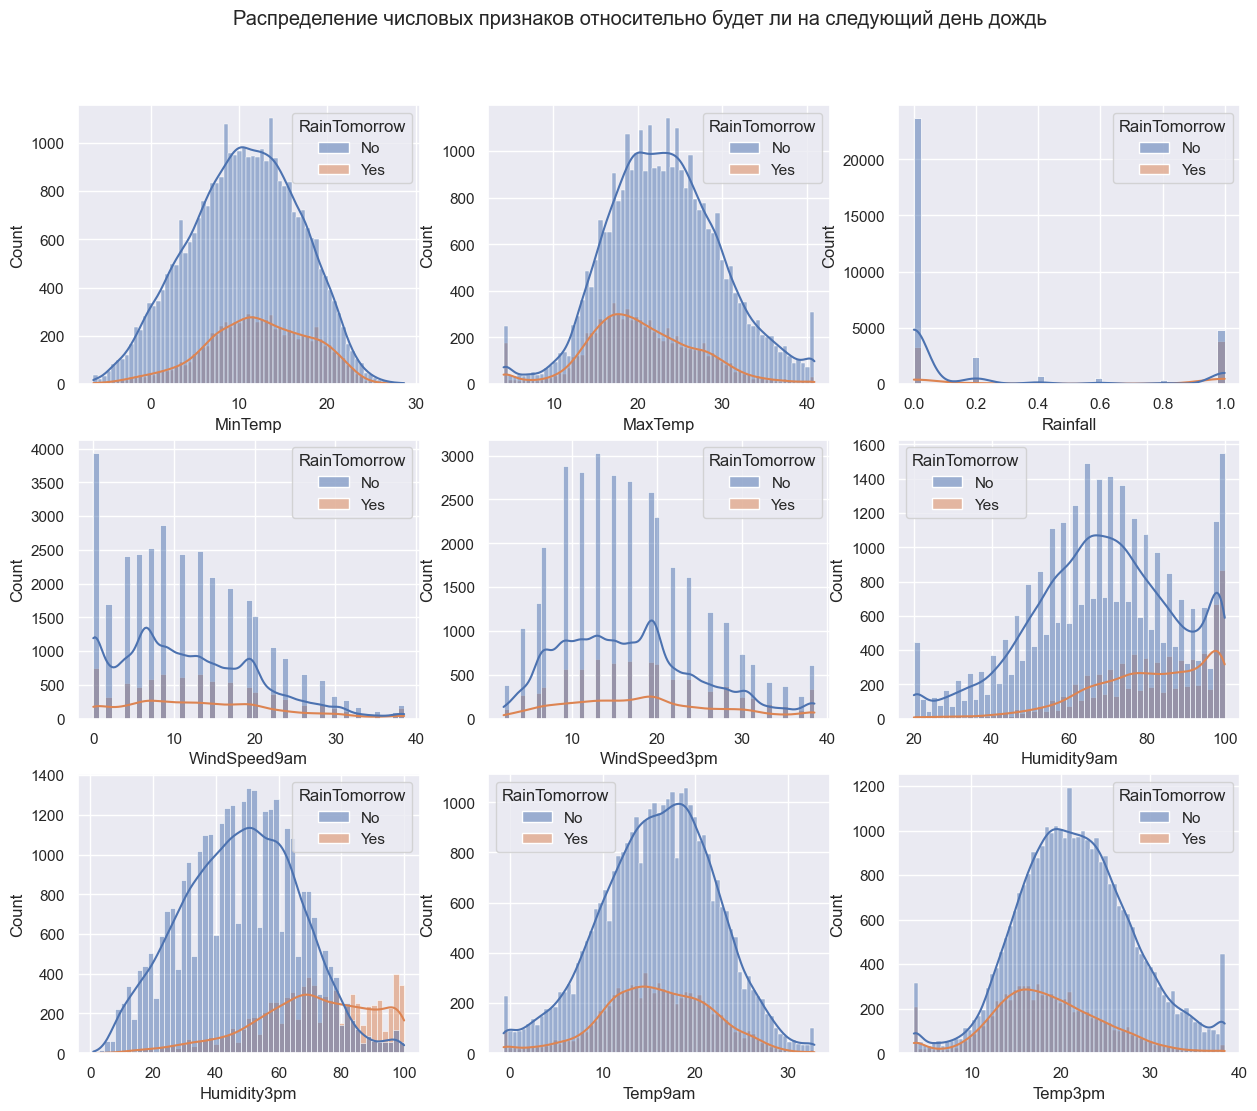

In [25]:
fig, axes = plt.subplots(3,3,figsize=(15,12))


plt.suptitle('Распределение числовых признаков относительно будет ли на следующий день дождь')
plt.subplots_adjust(top=0.9)


sns.histplot(data, x='MinTemp', hue = 'RainTomorrow', ax=axes[0][0], kde=True)
sns.histplot(data, x='MaxTemp', hue = 'RainTomorrow', ax=axes[0][1], kde=True)
sns.histplot(data, x='Rainfall', hue = 'RainTomorrow', ax=axes[0][2], kde=True)
sns.histplot(data, x='WindSpeed9am', hue = 'RainTomorrow', ax=axes[1][0], kde=True)
sns.histplot(data, x='WindSpeed3pm', hue = 'RainTomorrow', ax=axes[1][1], kde=True)
sns.histplot(data, x='Humidity9am', hue = 'RainTomorrow', ax=axes[1][2], kde=True)
sns.histplot(data, x='Humidity3pm', hue = 'RainTomorrow', ax=axes[2][0], kde=True)
sns.histplot(data, x='Temp9am', hue = 'RainTomorrow', ax=axes[2][1], kde=True)
sns.histplot(data, x='Temp3pm', hue = 'RainTomorrow', ax=axes[2][2], kde=True)



plt.show()

In [26]:
data.select_dtypes(include='object').columns

Index(['Date', 'Location', 'WindDir3pm', 'RainToday', 'RainTomorrow'], dtype='object')

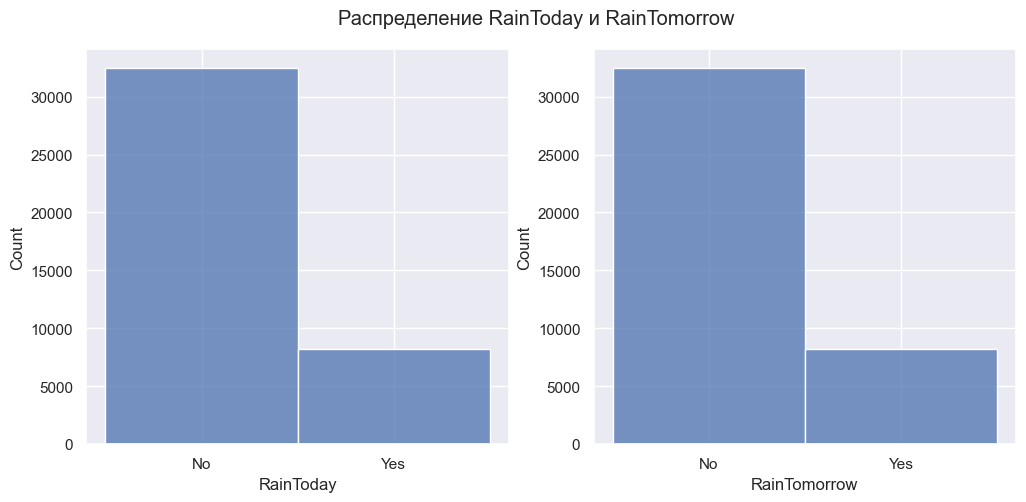

In [27]:
fig, axes = plt.subplots(1,2,figsize=(12,5))


plt.suptitle('Распределение RainToday и RainTomorrow')
plt.subplots_adjust(top=0.9)


sns.histplot(data, x='RainToday', ax=axes[0])
sns.histplot(data, x='RainTomorrow', ax=axes[1])



plt.show()

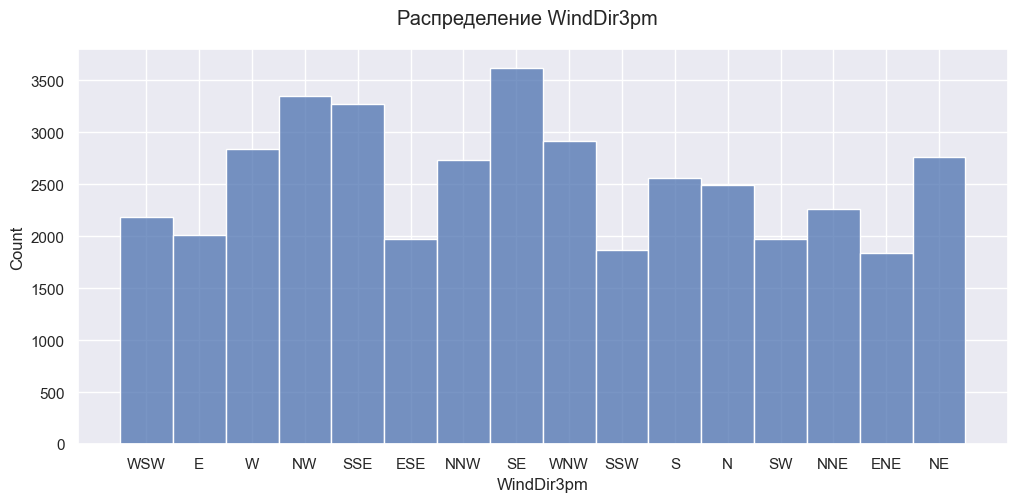

In [28]:
fig, axes = plt.subplots(figsize=(12,5))


plt.suptitle('Распределение WindDir3pm')
plt.subplots_adjust(top=0.9)

sns.histplot(data, x='WindDir3pm')
plt.show()

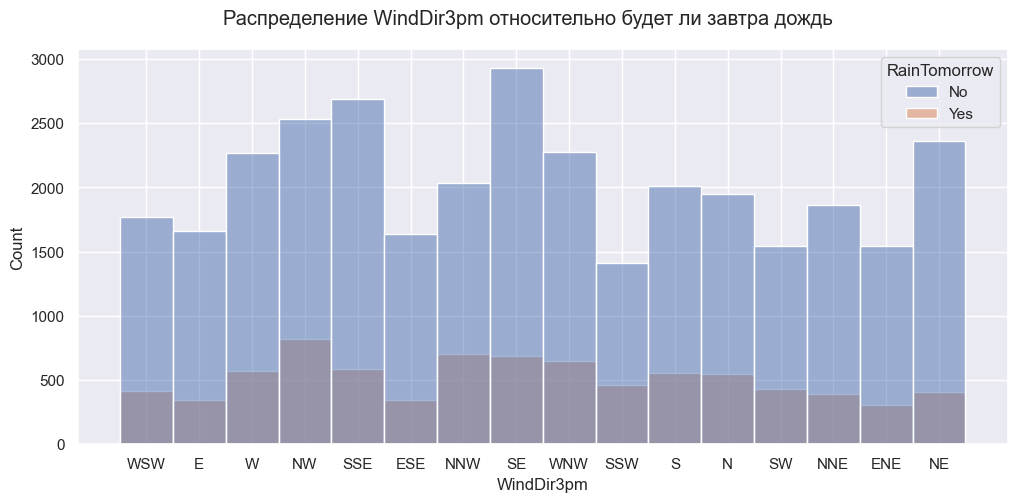

In [36]:
fig, axes = plt.subplots(figsize=(12,5))


plt.suptitle('Распределение WindDir3pm относительно будет ли завтра дождь')
plt.subplots_adjust(top=0.9)

sns.histplot(data, x='WindDir3pm', hue='RainTomorrow')
plt.show()

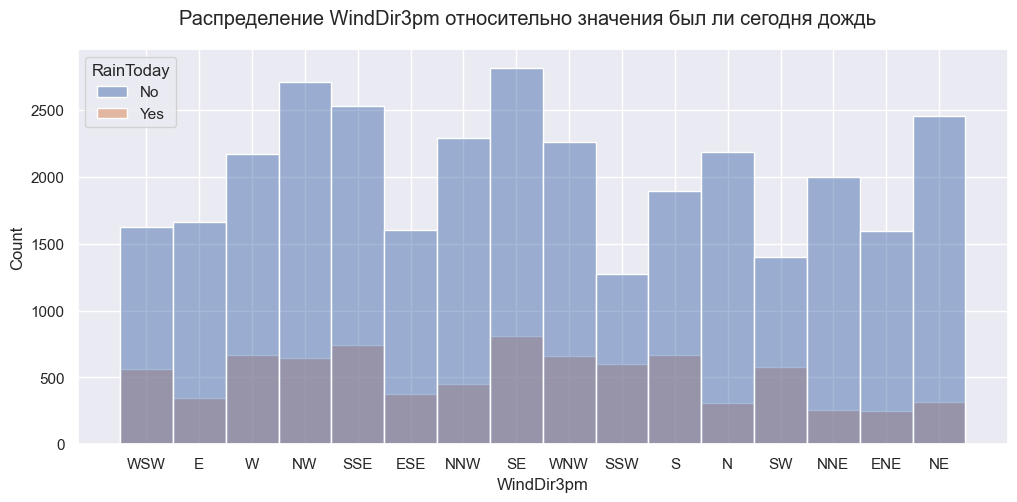

In [37]:
fig, axes = plt.subplots(figsize=(12,5))


plt.suptitle('Распределение WindDir3pm относительно значения был ли сегодня дождь')
plt.subplots_adjust(top=0.9)

sns.histplot(data, x='WindDir3pm', hue='RainToday')
plt.show()

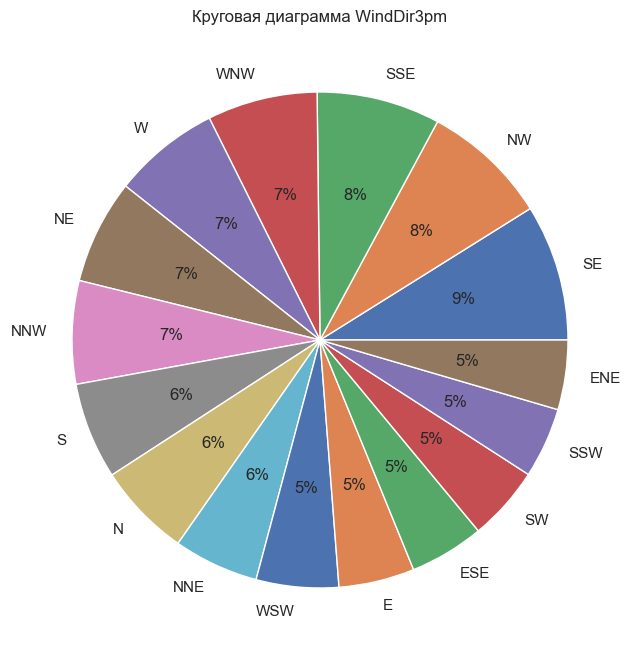

In [29]:
labels = data['WindDir3pm'].value_counts().index
value = data['WindDir3pm'].value_counts().values

plt.figure(figsize=(8,5))
plt.title('Круговая диаграмма WindDir3pm')
plt.pie(x = value, labels=labels, autopct='%.0f%%')
plt.subplots_adjust(top=1.5)

plt.show()

In [30]:
data['Date'] = pd.to_datetime(data['Date']) # перевод из object в datetime64
data['year'] = data['Date'].dt.year # выделяем год

In [31]:
dmin = {} # словарь, где собираем среднюю тинимальную температуру
dmax = {} # словарь, где собираем среднюю максимальную температуру
for yr in data['year'].unique():
    dmin[yr] = np.mean(data[data['year']==yr]['MinTemp']) # средняя минимальная температура
    dmax[yr] = np.mean(data[data['year']==yr]['MaxTemp']) #средняя максимальная температура

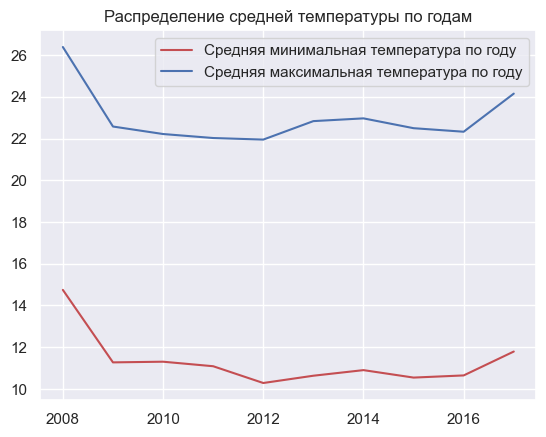

In [32]:
plt.title('Распределение средней температуры по годам')
plt.plot(dmin.keys(), dmin.values(), c='r', label='Средняя минимальная температура по году')
plt.plot(dmax.keys(), dmax.values(), c='b', label='Средняя максимальная температура по году')
plt.legend()
plt.show()

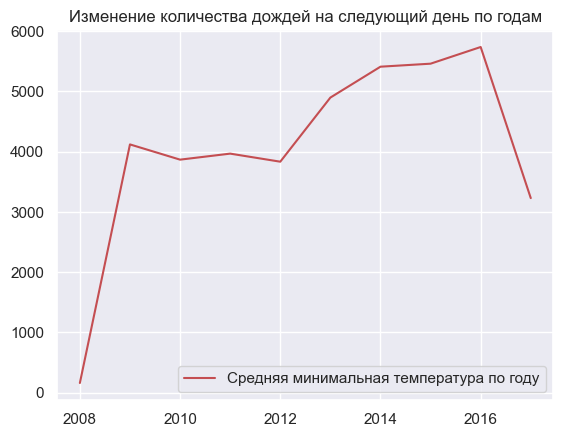

In [52]:
yearRainTomorrow = data.groupby('year').count()['RainTomorrow'] # агрегируем данные 
plt.title('Изменение количества дождей на следующий день по годам')
plt.plot(yearRainTomorrow.index, yearRainTomorrow.values, c='r', label='Средняя минимальная температура по году')
plt.legend()
plt.show()

In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40690 entries, 1 to 145457
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          40690 non-null  datetime64[ns]
 1   Location      40690 non-null  object        
 2   MinTemp       40690 non-null  float64       
 3   MaxTemp       40690 non-null  float64       
 4   Rainfall      40690 non-null  float64       
 5   WindDir3pm    40690 non-null  object        
 6   WindSpeed9am  40690 non-null  float64       
 7   WindSpeed3pm  40690 non-null  float64       
 8   Humidity9am   40690 non-null  float64       
 9   Humidity3pm   40690 non-null  float64       
 10  Temp9am       40690 non-null  float64       
 11  Temp3pm       40690 non-null  float64       
 12  RainToday     40690 non-null  object        
 13  RainTomorrow  40690 non-null  object        
dtypes: datetime64[ns](1), float64(9), object(4)
memory usage: 4.7+ MB


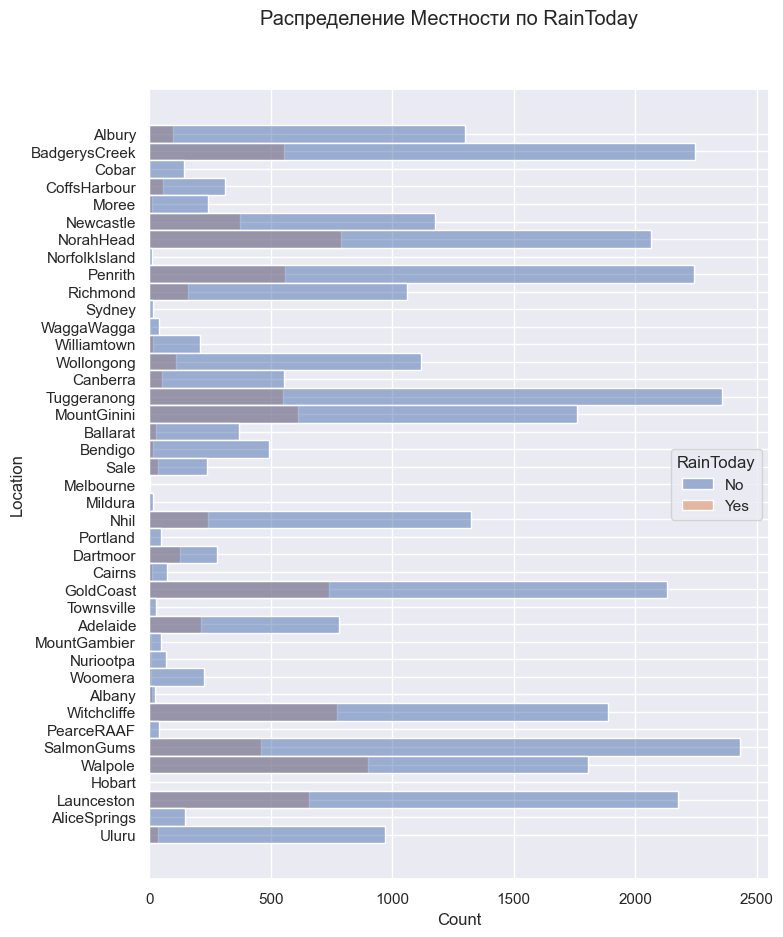

In [114]:
fig, axes = plt.subplots(figsize=(8,10))


plt.suptitle('Распределение Местности по RainToday')
plt.subplots_adjust(top=0.9)

sns.histplot(data, y='Location', hue='RainToday')

plt.show()

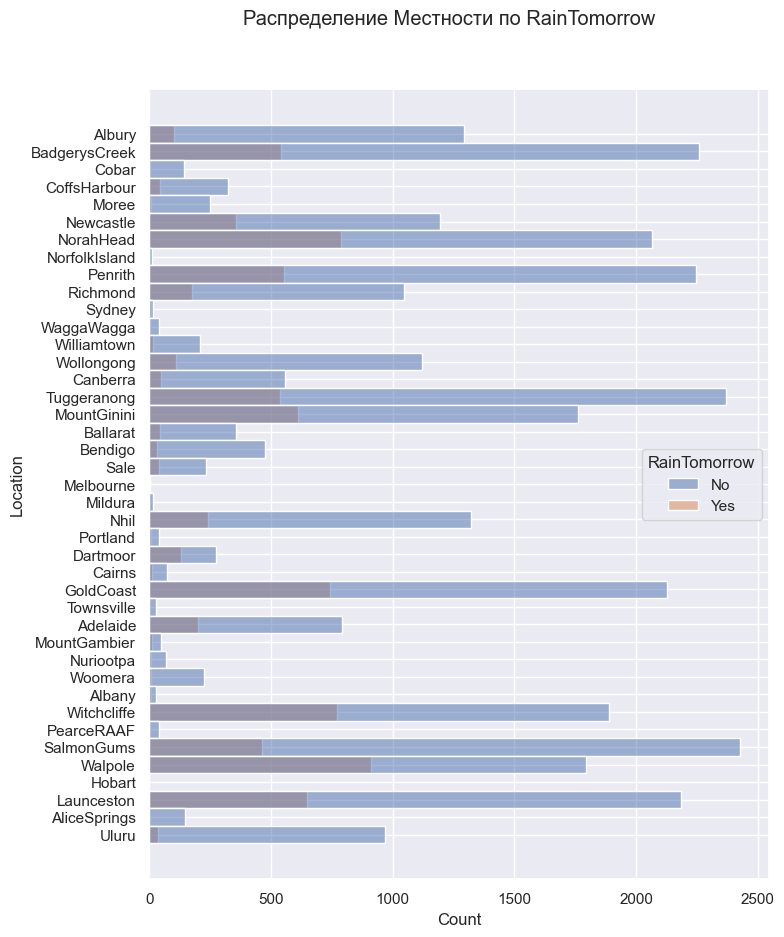

In [115]:
fig, axes = plt.subplots(figsize=(8,10))


plt.suptitle('Распределение Местности по RainTomorrow')
plt.subplots_adjust(top=0.9)

sns.histplot(data, y='Location', hue='RainTomorrow')

plt.show()

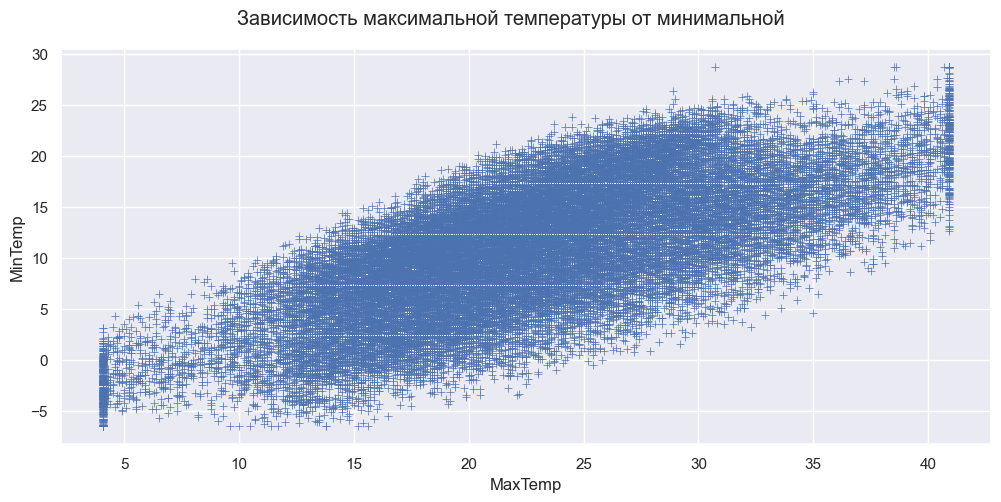

In [116]:
fig, ax = plt.subplots(figsize=(12,5))


plt.suptitle('Зависимость максимальной температуры от минимальной')
plt.subplots_adjust(top=0.9)

ax.scatter(data['MaxTemp'], data['MinTemp'], lw=0.5, marker='+')

ax.set_xlabel('MaxTemp')
ax.set_ylabel('MinTemp')

plt.show()

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40690 entries, 1 to 145457
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          40690 non-null  datetime64[ns]
 1   Location      40690 non-null  object        
 2   MinTemp       40690 non-null  float64       
 3   MaxTemp       40690 non-null  float64       
 4   Rainfall      40690 non-null  float64       
 5   WindDir3pm    40690 non-null  object        
 6   WindSpeed9am  40690 non-null  float64       
 7   WindSpeed3pm  40690 non-null  float64       
 8   Humidity9am   40690 non-null  float64       
 9   Humidity3pm   40690 non-null  float64       
 10  Temp9am       40690 non-null  float64       
 11  Temp3pm       40690 non-null  float64       
 12  RainToday     40690 non-null  object        
 13  RainTomorrow  40690 non-null  object        
dtypes: datetime64[ns](1), float64(9), object(4)
memory usage: 4.7+ MB


Итоговая корреляционная матрица

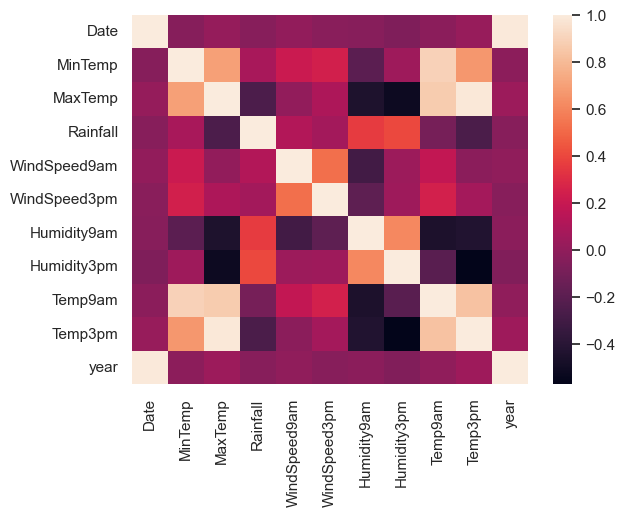

In [53]:
sns.heatmap(data.select_dtypes(exclude='object').corr())
plt.show()

In [122]:
from imblearn.over_sampling import SMOTENC

In [123]:
sm = SMOTENC(#sampling_strategy = 0.5,
	    random_state=42,
	    k_neighbors=5, categorical_features=[0,7,9,10,21,22])

In [124]:
x, y = pd.get_dummies( data.drop(columns=['RainTomorrow','Date']),drop_first=True), data['RainTomorrow'].apply(lambda x: {'Yes':1, 'No':0}[x])

In [125]:
Xim, Yim = sm.fit_resample(x,y)

In [136]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [137]:
from sklearn.model_selection import train_test_split
y = data['RainTomorrow'].apply(lambda x: {'Yes':1, 'No':0}[x])

In [138]:
x_train, x_test, y_train, y_test = train_test_split(Xim,Yim)

In [139]:
from sklearn.metrics import f1_score

In [140]:
m = DecisionTreeClassifier()

In [158]:
distributions = {'criterion' : ["gini", "entropy", "log_loss"],
                 'max_depth':[None,25, 26,28,31,32,33,35,45,50,55,70,80],
                 'max_leaf_nodes':[None, 6,8,10,15,16,17,20,21,24,27,28,30,35,50,70,80,190,210,220,250],
                 'min_samples_split':[6,7,8,10,12],
                }
clf = RandomizedSearchCV(m, distributions, random_state=0).fit(x_train, y_train)

In [159]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=35, max_leaf_nodes=250, min_samples_split=6)

In [170]:
f1_score(y_train, clf.predict(x_train))

0.8672398932032712

In [171]:
f1_score(y_test, clf.predict(x_test))

0.8592734225621415

In [165]:
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

In [167]:
m = DecisionTreeClassifier(max_depth=35, max_leaf_nodes=250, min_samples_split=6)

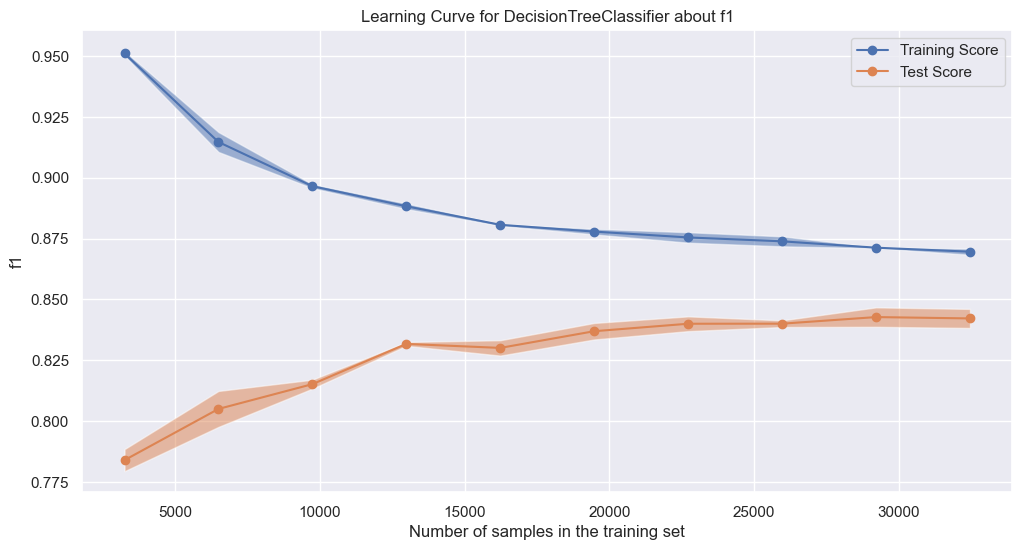

In [175]:
fig, ax = plt.subplots(figsize=(12,6))

common_params = {
    "X": x_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1.0, 10),
    "cv": 3,
    "score_type": "both",
    "n_jobs": 3,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "f1",
}


LearningCurveDisplay.from_estimator(m, **common_params, scoring='f1', ax=ax)
handles, label = ax.get_legend_handles_labels()
ax.legend(handles[:2], ["Training Score", "Test Score"])
ax.set_title(f"Learning Curve for {m.__class__.__name__} about f1")
plt.show()